In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from IPython.display import display
import squarify

In [2]:
# 한글 글꼴 설정 (Windows 환경)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# 데이터 불러오기

file_path = 'C:/sesac/프로젝트2/refined.csv'
try: data = pd.read_csv(file_path, encoding='cp949')
except UnicodeDecodeError:
        data = pd.read_csv(file_path, encoding='euc-kr')

In [4]:
# 결측치 처리
data.fillna(0, inplace=True)


In [5]:
# 매출 및 이용건수 관련 열 이름
male_sales_columns = [
    "남성20대미만매출금액합계",
    "남성20대매출금액합계",
    "남성30대매출금액합계",
    "남성40대매출금액합계",
    "남성50대매출금액합계",
    "남성60대이상매출금액합계"
]
female_sales_columns = [
    "여성20대미만매출금액합계",
    "여성20대매출금액합계",
    "여성30대매출금액합계",
    "여성40대매출금액합계",
    "여성50대매출금액합계",
    "여성60대이상매출금액합계"
]

male_usage_columns = [
    "남성20대미만이용건수합계",
    "남성20대이용건수합계",
    "남성30대이용건수합계",
    "남성40대이용건수합계",
    "남성50대이용건수합계",
    "남성60대이상이용건수합계"
]

female_usage_columns = [
    "여성20대미만이용건수합계",
    "여성20대이용건수합계",
    "여성30대이용건수합계",
    "여성40대이용건수합계",
    "여성50대이용건수합계",
    "여성60대이상이용건수합계"]

In [6]:
# 성별 및 업종별 매출/이용건수 합계 계산
data["남성_매출_합계"] = data[male_sales_columns].sum(axis=1)
data["여성_매출_합계"] = data[female_sales_columns].sum(axis=1)
data["업종별_총매출_합계"] = data["남성_매출_합계"] + data["여성_매출_합계"]
data["남성_이용건수_합계"] = data[male_usage_columns].sum(axis=1)
data["여성_이용건수_합계"] = data[female_usage_columns].sum(axis=1)
data["업종별_총이용건수_합계"] = data["남성_이용건수_합계"] + data["여성_이용건수_합계"]


In [7]:
#성별 별 합계 이용건수/ 매출을 데이처 만 / 100만 =1의 자리로 반올림
data["(반)남성_이용건수_합계"] = (data[male_usage_columns].sum(axis=1) / 10000).round(1)
data["(반)여성_이용건수_합계"] = (data[female_usage_columns].sum(axis=1) / 10000).round(1)
data["(반)업종별_총이용건수_합계"] = (data["(반)남성_이용건수_합계"] + data["(반)여성_이용건수_합계"]).round(1)

# 매출 합계 10만 단위로 반올림 (소수점 첫째 자리에서 100만원 단위로 반올림) 1의자리 =1000만
data["(반)남성_매출_합계"] = (data["남성_매출_합계"] / 10000000).round(1)
data["(반)여성_매출_합계"] = (data["여성_매출_합계"] / 10000000).round(1)
data["(반)업종별_총매출_합계"] = (data["업종별_총매출_합계"] / 10000000).round(1)

In [8]:
# 1. 성별 별 각 중분류업종명에 대한 건수 합계(가공 전 )
grouped_usage_gender_1 = data.groupby("중분류업종명")[["남성_이용건수_합계", "여성_이용건수_합계"]].sum().reset_index()
print(grouped_usage_gender_1)


        중분류업종명  남성_이용건수_합계  여성_이용건수_합계
0         간이주점  37752656.0  17180081.0
1         고기요리  86051437.0  41135993.0
2       닭/오리요리  23955597.0  11656009.0
3      별식/퓨전요리  12753347.0   7343362.0
4           부페   5998411.0   3023655.0
5           분식  25281912.0  21437697.0
6           양식   7707071.0   6803564.0
7         유흥주점   3201108.0   1352083.0
8      음식배달서비스     46560.0     20605.0
9       일식/수산물  42892254.0  24336067.0
10  제과/제빵/떡/케익  16568311.0  23345385.0
11          중식  32158610.0  34518043.0
12       커피/음료  40348022.0  40484193.0
13       패스트푸드   5660659.0   6383378.0
14          한식  65723229.0  33190166.0
15    휴게소/대형업체    120373.0     66398.0


In [9]:
# 1. 성별 별 각 중분류업종명에 대한 건수 합계(축소 후 :  만 단위) -> 보기 편하게끔 수치 크기 축소했습니다. 
grouped_usage_gender = data.groupby("중분류업종명")[["(반)남성_이용건수_합계", "(반)여성_이용건수_합계"]].sum().reset_index()
print(grouped_usage_gender)

        중분류업종명  (반)남성_이용건수_합계  (반)여성_이용건수_합계
0         간이주점         3771.2         1712.4
1         고기요리         8599.5         4105.7
2       닭/오리요리         2387.4         1160.0
3      별식/퓨전요리         1268.7          723.7
4           부페          597.7          300.9
5           분식         2521.1         2136.5
6           양식          762.3          673.0
7         유흥주점          315.5          128.1
8      음식배달서비스            3.1            1.1
9       일식/수산물         4281.4         2426.4
10  제과/제빵/떡/케익         1649.1         2330.2
11          중식         3210.5         3444.1
12       커피/음료         4028.9         4043.8
13       패스트푸드          557.4          626.7
14          한식         6562.0         3310.7
15    휴게소/대형업체            9.0            4.2


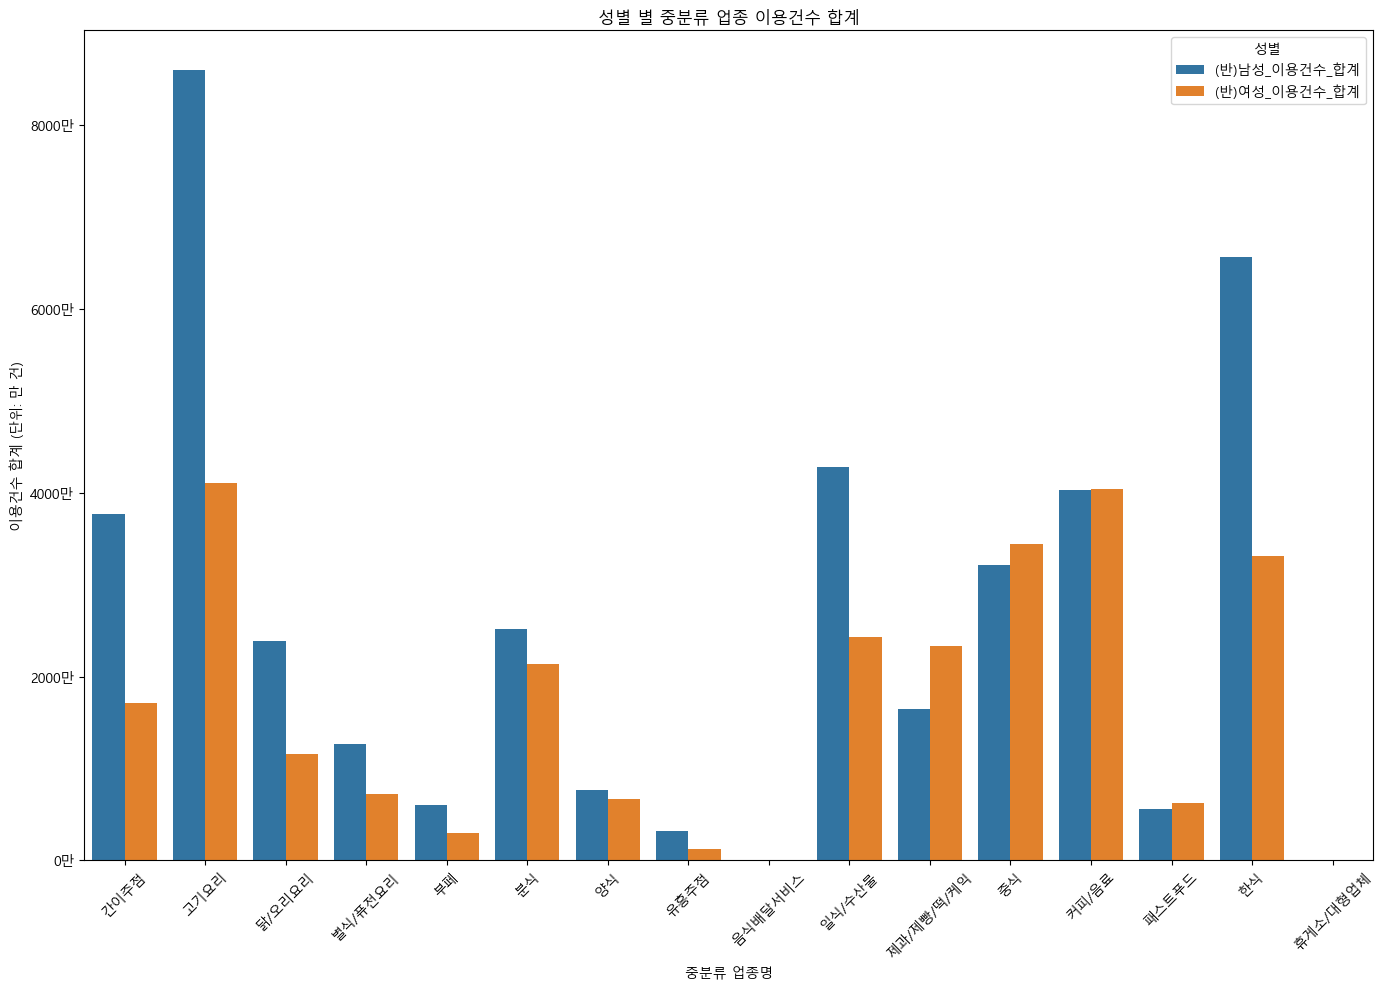

In [10]:
# 시각화: 성별 별 중분류 업종 이용건수 합계
plt.figure(figsize=(14, 10))
ax = sns.barplot(
    data=grouped_usage_gender.melt(id_vars=["중분류업종명"], var_name="성별", value_name="이용건수 합계"),
    x="중분류업종명",
    y="이용건수 합계",
    hue="성별"
)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x)}만'))
plt.title("성별 별 중분류 업종 이용건수 합계")
plt.xlabel("중분류 업종명")
plt.ylabel("이용건수 합계 (단위: 만 건)")
plt.xticks(rotation=45)
plt.legend(title="성별")
plt.tight_layout()
plt.show()

In [11]:
# 2. 성별 별 각 중분류업종명에 대한 매출 합계(축소 후 :  1000만원 단위)
grouped_sales_gender = data.groupby("중분류업종명")[["(반)남성_매출_합계", "(반)여성_매출_합계"]].sum().reset_index()
print(grouped_sales_gender)

        중분류업종명  (반)남성_매출_합계  (반)여성_매출_합계
0         간이주점      29013.2      13222.1
1         고기요리      84614.3      41453.1
2       닭/오리요리      21844.9      11392.6
3      별식/퓨전요리      12624.2       8289.9
4           부페       7241.7       4031.2
5           분식      16071.4      12691.6
6           양식       9098.2       8292.4
7         유흥주점       4856.6       1617.4
8      음식배달서비스         42.8         22.0
9       일식/수산물      48108.7      27148.5
10  제과/제빵/떡/케익       7322.8      10202.5
11          중식      17565.6      10456.6
12       커피/음료      16096.6      17484.2
13       패스트푸드       3634.8       4183.1
14          한식      62658.0      33412.7
15    휴게소/대형업체         67.4         32.3


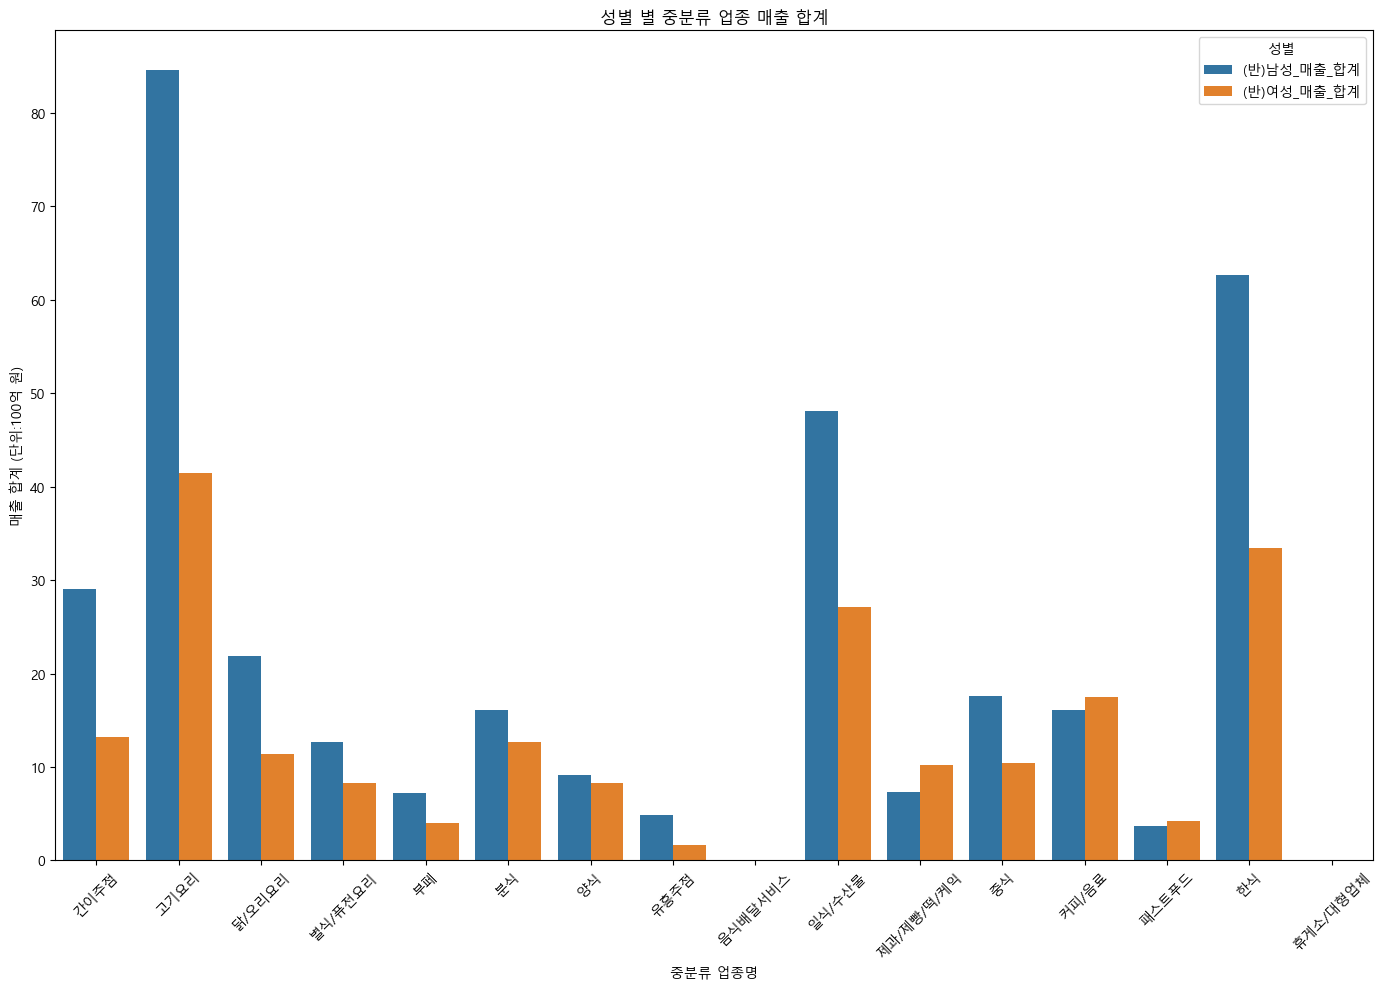

In [12]:
# 시각화: 성별 별 중분류 업종 매출 합계
plt.figure(figsize=(14, 10))
ax = sns.barplot(
    data=grouped_sales_gender.melt(id_vars=["중분류업종명"], var_name="성별", value_name="매출 합계"),
    x="중분류업종명",
    y="매출 합계",
    hue="성별"
)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1000)}'))
plt.title("성별 별 중분류 업종 매출 합계")
plt.xlabel("중분류 업종명")
plt.ylabel("매출 합계 (단위:100억 원)")
plt.xticks(rotation=45)
plt.legend(title="성별")
plt.tight_layout()
plt.show()

In [13]:
#  연령대별 이용건수 및 매출 관련 컬럼 정리
age_usage_columns = {
    "남성20대미만이용건수합계": "20대미만_남",
    "남성20대이용건수합계": "20대_남",
    "남성30대이용건수합계": "30대_남",
    "남성40대이용건수합계": "40대_남",
    "남성50대이용건수합계": "50대_남",
    "남성60대이상이용건수합계": "60대이상_남",
    "여성20대미만이용건수합계": "20대미만_여",
    "여성20대이용건수합계": "20대_여",
    "여성30대이용건수합계": "30대_여",
    "여성40대이용건수합계": "40대_여",
    "여성50대이용건수합계": "50대_여",
    "여성60대이상이용건수합계": "60대이상_여",
}

age_sales_columns = {
    "남성20대미만매출금액합계": "20대미만_남",
    "남성20대매출금액합계": "20대_남",
    "남성30대매출금액합계": "30대_남",
    "남성40대매출금액합계": "40대_남",
    "남성50대매출금액합계": "50대_남",
    "남성60대이상매출금액합계": "60대이상_남",
    "여성20대미만매출금액합계": "20대미만_여",
    "여성20대매출금액합계": "20대_여",
    "여성30대매출금액합계": "30대_여",
    "여성40대매출금액합계": "40대_여",
    "여성50대매출금액합계": "50대_여",
    "여성60대이상매출금액합계": "60대이상_여",
}


In [14]:
# 🔹 이용건수 데이터 정리 및 반올림 적용
data["(만건)총이용건수"] = (data[list(age_usage_columns.keys())].sum(axis=1) / 10000).round(1)
data.loc[(data["(만건)총이용건수"] < 0.1) & (data["(만건)총이용건수"] > 0), "(만건)총이용건수"] = 0.0  # 0.1 미만이면 0.0으로 표기하는 코드(0과 구별을 위해)

data_이용건수 = data[["중분류업종명"] + list(age_usage_columns.keys())].rename(columns=age_usage_columns)
usage_summary = data_이용건수.groupby("중분류업종명").sum().round(1).reset_index()

In [15]:
#표로 한 눈에 보고싶다면, 
display(usage_summary)

,중분류업종명,20대미만_남,20대_남,30대_남,40대_남,50대_남,60대이상_남,20대미만_여,20대_여,30대_여,40대_여,50대_여,60대이상_여
0,간이주점,34243.0,8561774.0,9918453.0,8790556.0,7607290.0,2840340.0,23360.0,5732869.0,4183376.0,3489030.0,2792359.0,959087.0
1,고기요리,240851.0,7880701.0,15674808.0,20691908.0,23224743.0,18338426.0,170067.0,5113167.0,7474931.0,9423260.0,10506372.0,8448196.0
2,닭/오리요리,76868.0,2137955.0,3993595.0,5845403.0,6920233.0,4981543.0,39535.0,1422571.0,1923874.0,2852011.0,3120922.0,2297096.0
3,별식/퓨전요리,54938.0,1287606.0,2426510.0,2934070.0,3264642.0,2785581.0,27530.0,1020391.0,1484234.0,1663901.0,1739468.0,1407838.0
4,부페,155142.0,903625.0,1070148.0,1461033.0,1361684.0,1046779.0,34205.0,374775.0,482928.0,794591.0,738210.0,598946.0
5,분식,214176.0,2253399.0,4369709.0,6500793.0,6814139.0,5129696.0,204778.0,2314622.0,3713114.0,5647372.0,5555717.0,4002094.0
6,양식,65028.0,1423191.0,2155300.0,1806916.0,1449950.0,806686.0,58159.0,1544360.0,1675607.0,1524929.0,1359225.0,641284.0
7,유흥주점,2221.0,791738.0,1120941.0,610935.0,497457.0,177816.0,2443.0,537323.0,429120.0,188109.0,144778.0,50310.0
8,음식배달서비스,30.0,6927.0,9290.0,10396.0,11684.0,8233.0,6.0,4349.0,4228.0,4397.0,4429.0,3196.0
9,일식/수산물,84664.0,3507128.0,6817268.0,9030580.0,11920396.0,11532218.0,88088.0,3107653.0,3960778.0,4837891.0,6502166.0,5839491.0


In [16]:
# 🔹 매출 데이터 정리 및 천만원 단위 변환 후 반올림 적용
data["(억)총매출"] = (data[list(age_sales_columns.keys())].sum(axis=1) / 100000000).round(1)
data.loc[(data["(억)총매출"] < 0.1) & (data["(억)총매출"] > 0), "(억)총매출"] = 0.0  # 0.1 미만이면 0.0으로

data_매출 = data[["중분류업종명"] + list(age_sales_columns.keys())].rename(columns=age_sales_columns)
sales_summary = data_매출.groupby("중분류업종명").sum().round(1).reset_index()

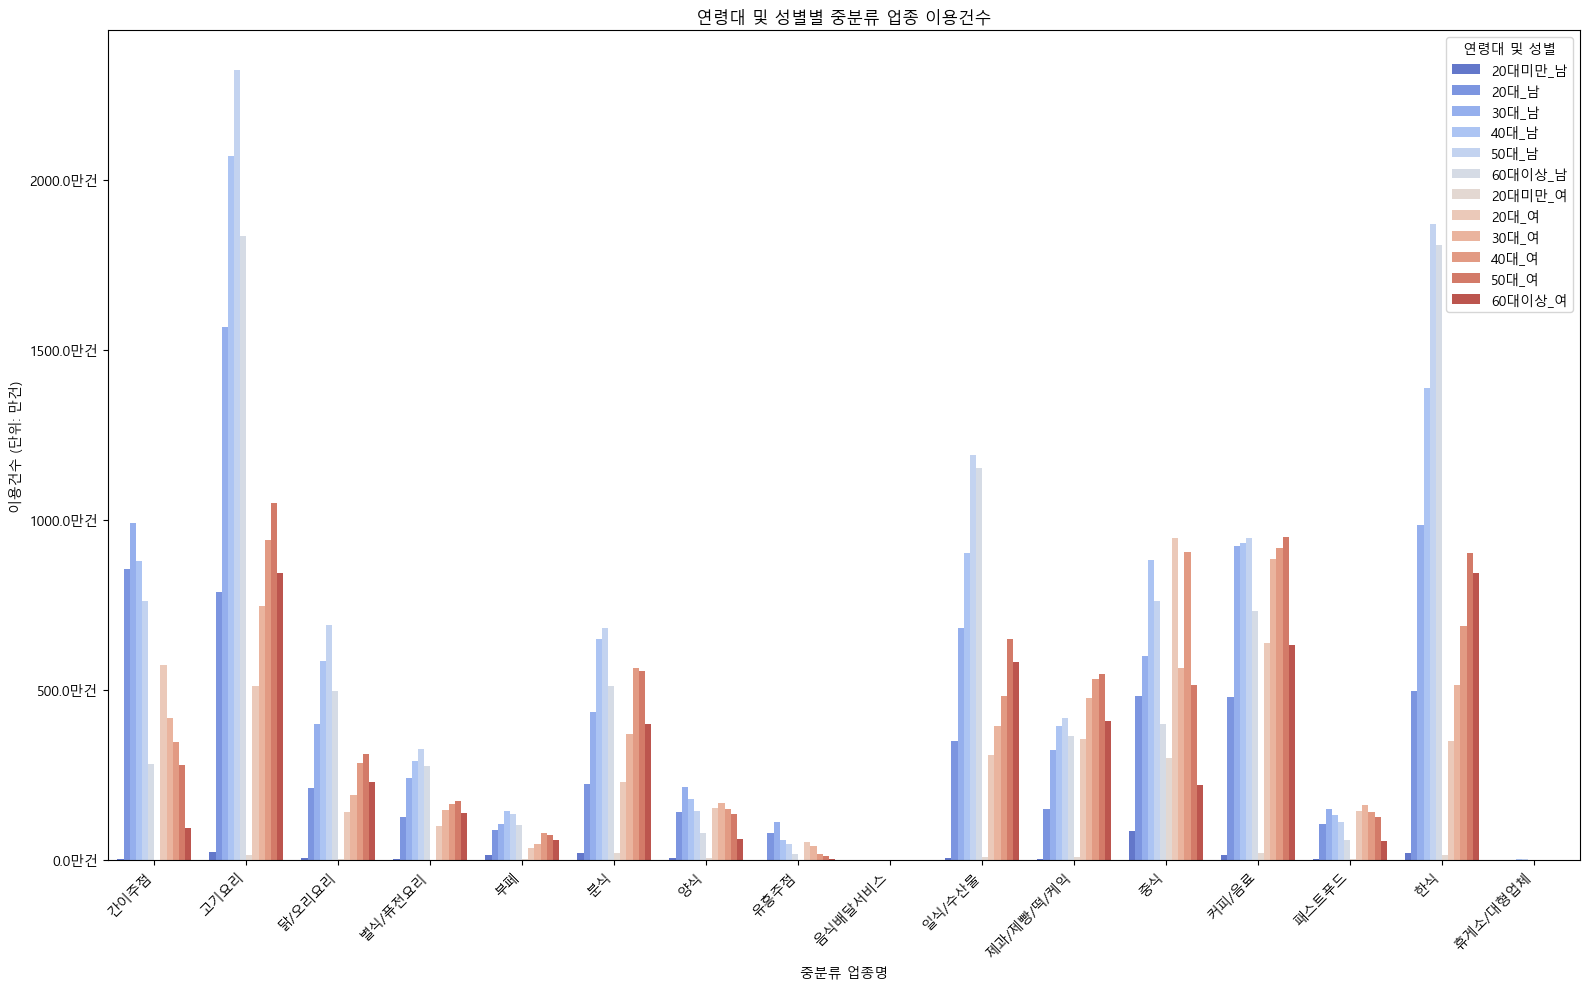

In [17]:
# 🔹 연령대별 중분류 업종 이용건수 시각화
usage_melted = usage_summary.melt(id_vars=["중분류업종명"], var_name="연령대_성별", value_name="이용건수(만건)")
plt.figure(figsize=(16, 10))
ax = sns.barplot(data=usage_melted, x="중분류업종명", y="이용건수(만건)", hue="연령대_성별", palette="coolwarm")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/10000:.1f}만건'))
plt.title("연령대 및 성별별 중분류 업종 이용건수")
plt.xlabel("중분류 업종명")
plt.ylabel("이용건수 (단위: 만건)")
plt.xticks(rotation=45, ha="right")
plt.legend(title="연령대 및 성별")
plt.tight_layout()
plt.show()

In [18]:
display(sales_summary)

,중분류업종명,20대미만_남,20대_남,30대_남,40대_남,50대_남,60대이상_남,20대미만_여,20대_여,30대_여,40대_여,50대_여,60대이상_여
0,간이주점,2.420521e+08,6.363587e+10,7.890711e+10,6.845546e+10,5.800607e+10,2.094553e+10,1.443596e+08,4.466216e+10,3.324047e+10,2.607258e+10,2.090394e+10,7.266718e+09
1,고기요리,2.057752e+09,7.180330e+10,1.558560e+11,2.013954e+11,2.272262e+11,1.878854e+11,8.603990e+08,4.916010e+10,7.584009e+10,9.130182e+10,1.061529e+11,9.127507e+10
2,닭/오리요리,6.614339e+08,1.818766e+10,3.535292e+10,5.187689e+10,6.233352e+10,5.008349e+10,2.701734e+08,1.262790e+10,1.801997e+10,2.625476e+10,3.095919e+10,2.584966e+10
3,별식/퓨전요리,4.456488e+08,1.216225e+10,2.436743e+10,2.973028e+10,3.203012e+10,2.755423e+10,2.880857e+08,1.127746e+10,1.657826e+10,1.849603e+10,1.977026e+10,1.654527e+10
4,부페,2.134534e+09,1.097945e+10,1.281186e+10,1.760927e+10,1.624643e+10,1.268139e+10,5.182031e+08,4.956820e+09,6.373872e+09,1.056384e+10,9.733006e+09,8.200677e+09
5,분식,1.372042e+09,1.391606e+10,2.729690e+10,3.880016e+10,4.318156e+10,3.619571e+10,1.278495e+09,1.409531e+10,2.159832e+10,3.088475e+10,3.305395e+10,2.604803e+10
6,양식,6.011414e+08,1.550278e+10,2.581267e+10,2.134961e+10,1.732352e+10,1.044133e+10,5.926244e+08,1.844775e+10,2.120111e+10,1.806740e+10,1.644085e+10,8.231598e+09
7,유흥주점,2.104225e+07,9.407660e+09,1.693930e+10,1.167422e+10,8.010966e+09,2.571417e+09,1.846290e+07,6.033249e+09,5.420908e+09,2.341190e+09,1.703712e+09,7.450111e+08
8,음식배달서비스,4.062000e+05,6.451280e+07,9.744860e+07,8.638970e+07,1.052050e+08,9.439360e+07,2.400000e+04,5.777830e+07,5.421740e+07,3.949240e+07,4.608180e+07,4.071160e+07
9,일식/수산물,7.009942e+08,3.383629e+10,7.567491e+10,1.009461e+11,1.371775e+11,1.328086e+11,7.128668e+08,3.141805e+10,4.361658e+10,5.172348e+10,7.507463e+10,6.897989e+10


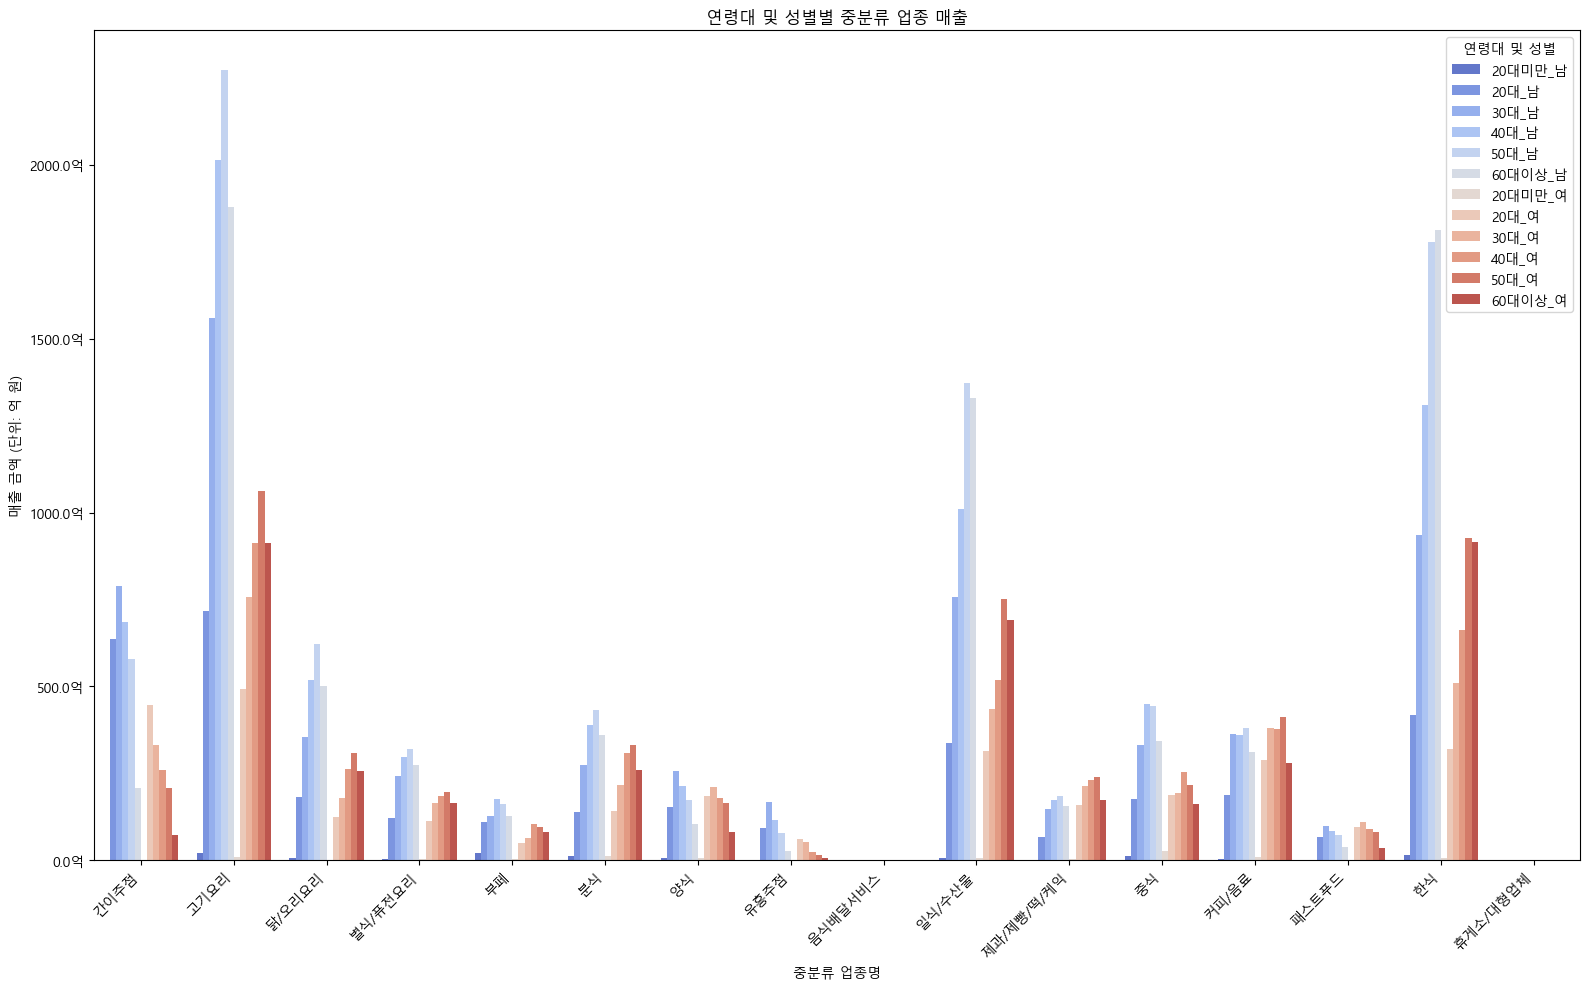

In [19]:
# 🔹 연령대별 중분류 업종 매출 시각화
sales_melted = sales_summary.melt(id_vars=["중분류업종명"], var_name="연령대_성별", value_name="매출금액(천만)")
plt.figure(figsize=(16, 10))
ax = sns.barplot(data=sales_melted, x="중분류업종명", y="매출금액(천만)", hue="연령대_성별", palette="coolwarm")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/ 100000000:.1f}억'))
plt.title("연령대 및 성별별 중분류 업종 매출")
plt.xlabel("중분류 업종명")
plt.ylabel("매출 금액 (단위: 억 원)")
plt.xticks(rotation=45, ha="right")
plt.legend(title="연령대 및 성별")
plt.tight_layout()
plt.show()


In [20]:
#  60대 이상 데이터 필터링
columns_60s_sales = ["남성60대이상매출금액합계", "여성60대이상매출금액합계"]
columns_60s_usage = ["남성60대이상이용건수합계", "여성60대이상이용건수합계"]
data_60s = data[["중분류업종명", "기준연월"]+ columns_60s_sales + columns_60s_usage]

In [21]:
# 월별 60대 이상 매출 및 이용건수 표 생성
sales_summary_60s = data_60s.groupby("기준연월")[columns_60s_sales].sum().div(100000000).round(1)
usage_summary_60s = data_60s.groupby("기준연월")[columns_60s_usage].sum().div(10000).round(1)

In [22]:
display(sales_summary_60s) # 기준 1억 

,남성60대이상매출금액합계,여성60대이상매출금액합계
기준연월,,
202307,578.3,314.5
202308,578.0,319.3
202309,543.5,294.5
202310,574.7,321.4
202311,526.7,284.2
202312,628.4,331.3
202401,598.0,326.0
202402,578.9,305.6
202403,706.1,389.4


In [23]:
display(usage_summary_60s) #기준 :만 단위 

,남성60대이상이용건수합계,여성60대이상이용건수합계
기준연월,,
202307,616.9,346.4
202308,624.7,356.2
202309,590.6,329.1
202310,629.3,361.7
202311,577.0,322.9
202312,659.0,357.8
202401,662.5,370.3
202402,639.9,347.7
202403,772.8,439.1


In [24]:
sales_summary_60s = sales_summary_60s.reset_index()
sales_summary_60s["총매출(억)"] = sales_summary_60s[columns_60s_sales].sum(axis=1)
usage_summary_60s = usage_summary_60s.reset_index()
usage_summary_60s["총이용건수(만건)"] = usage_summary_60s[columns_60s_usage].sum(axis=1)

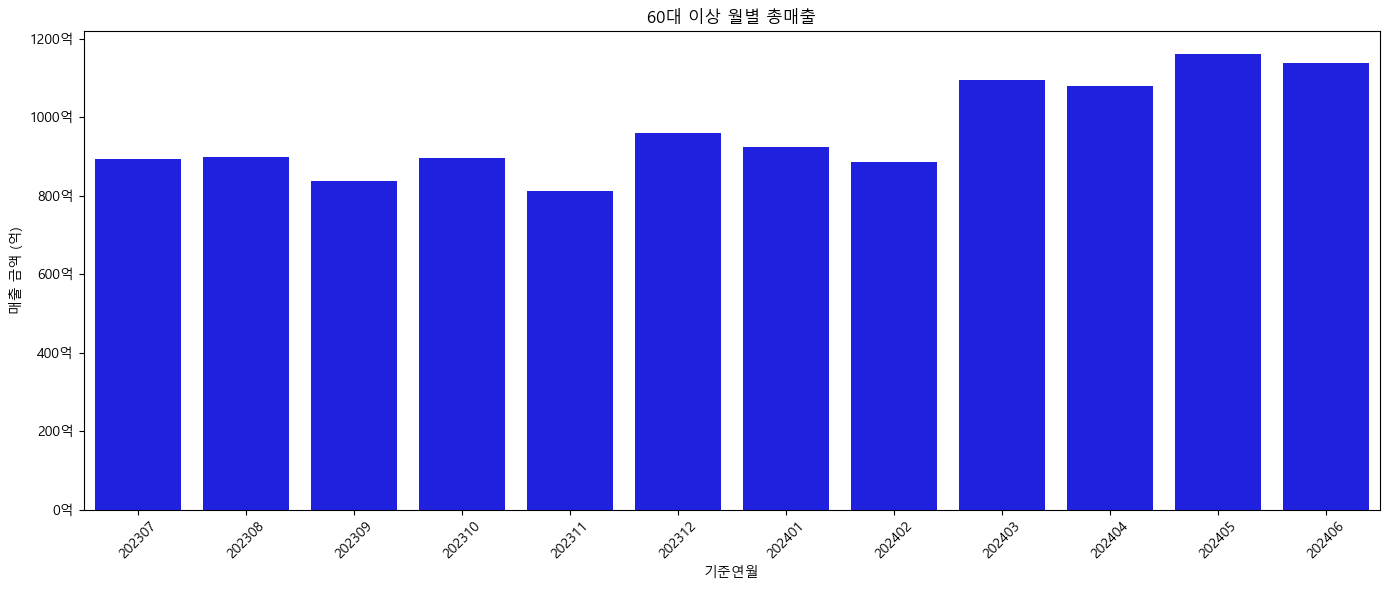

In [25]:
#  월별 총매출 막대그래프
plt.figure(figsize=(14, 6))
sns.barplot(x=sales_summary_60s["기준연월"], y=sales_summary_60s["총매출(억)"], color="blue")
plt.title("60대 이상 월별 총매출")
plt.xlabel("기준연월")
plt.ylabel("매출 금액 (억)")
plt.xticks(rotation=45)
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x)}억'))
plt.tight_layout()
plt.show()


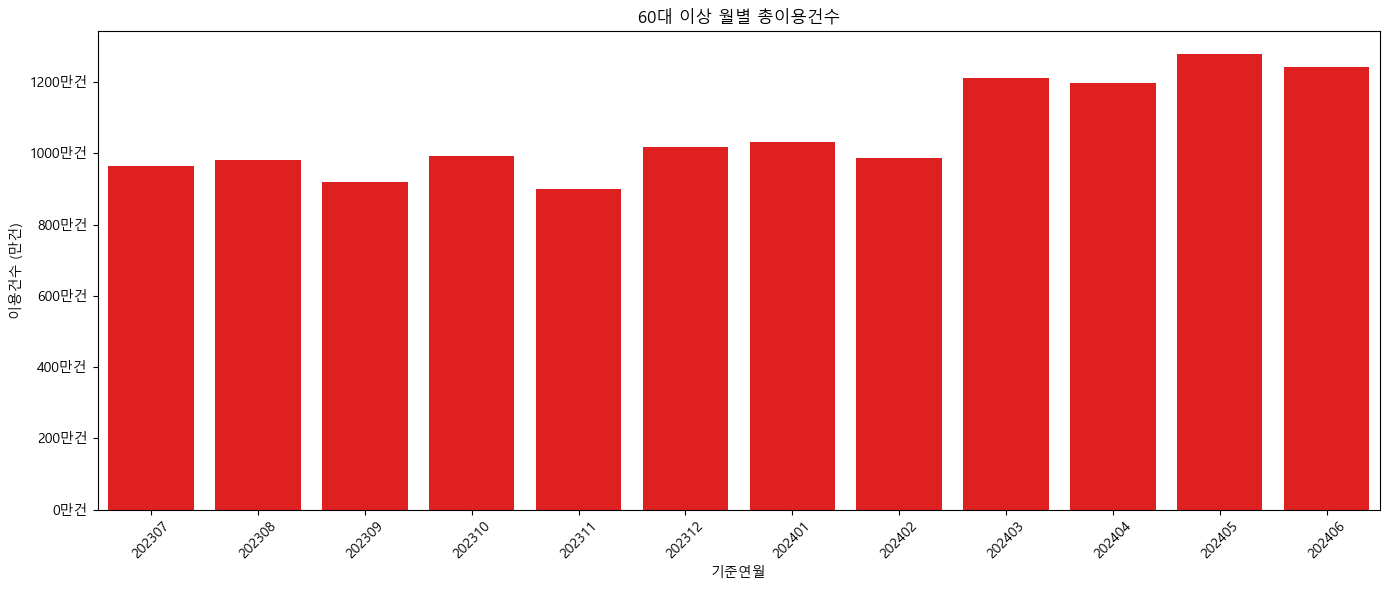

In [26]:
#  월별 총이용건수 막대그래프
plt.figure(figsize=(14, 6))
sns.barplot(x=usage_summary_60s["기준연월"], y=usage_summary_60s["총이용건수(만건)"], color="red")
plt.title("60대 이상 월별 총이용건수")
plt.xlabel("기준연월")
plt.ylabel("이용건수 (만건)")
plt.xticks(rotation=45)
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x)}만건'))
plt.tight_layout()
plt.show()

In [27]:
display(sales_summary_60s[["총매출(억)"]])
display(usage_summary_60s[["총이용건수(만건)"]])

,총매출(억)
0,892.8
1,897.3
2,838.0
3,896.1
4,810.9
5,959.7
6,924.0
7,884.5
8,1095.5
9,1079.9


,총이용건수(만건)
0,963.3
1,980.9
2,919.7
3,991.0
4,899.9
5,1016.8
6,1032.8
7,987.6
8,1211.9
9,1198.2


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_14912\2010592741.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_60s["(만건)총이용건수_60대"] = (data_60s[columns_60s_usage].sum(axis=1) / 10000).round(1)


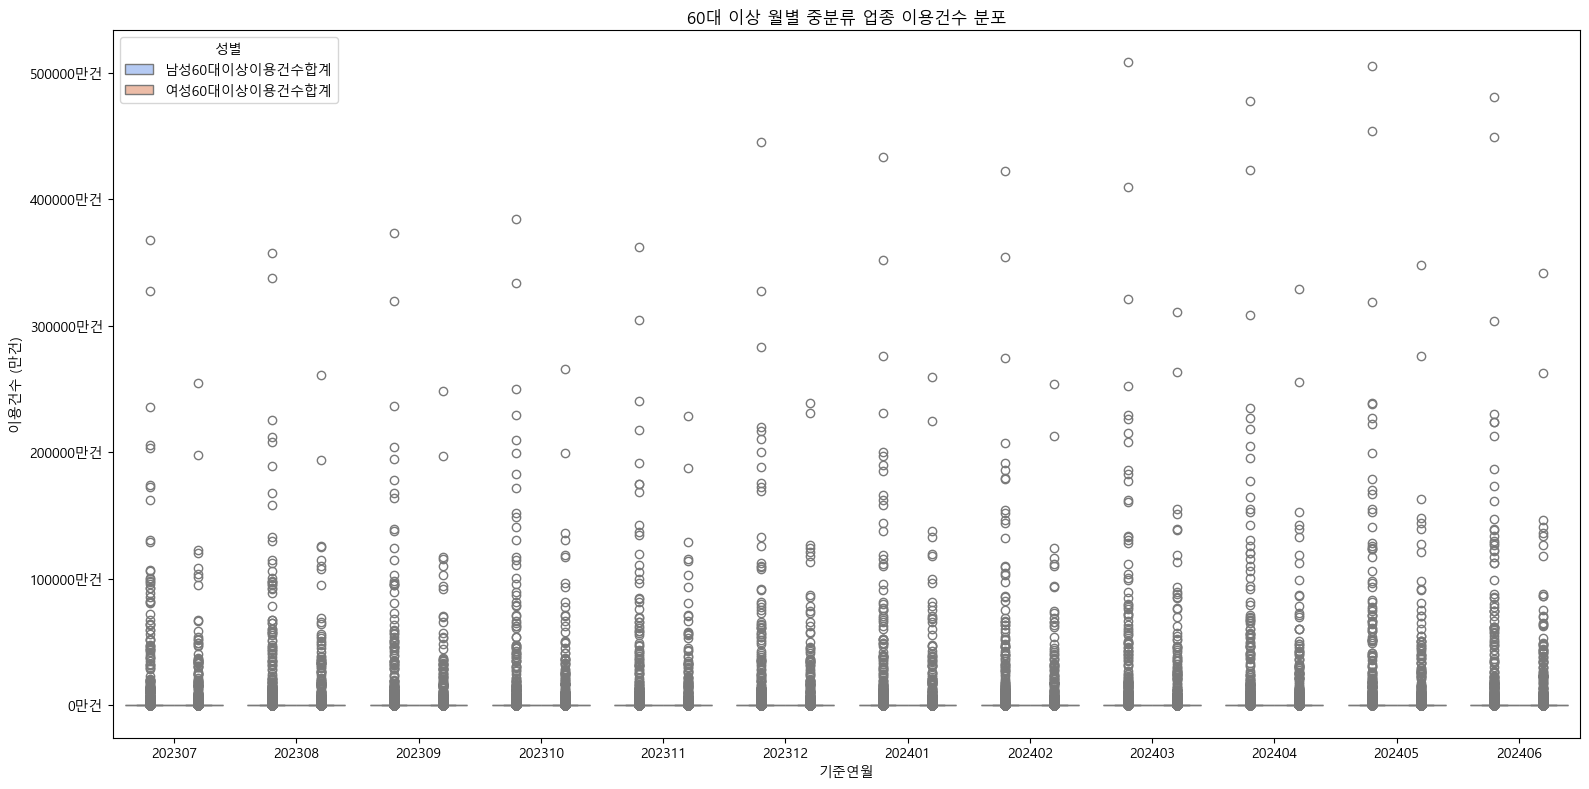

In [ ]:
# 🔹 이용건수 데이터 변환 및 시각화
data_60s["(만건)총이용건수_60대"] = (data_60s[columns_60s_usage].sum(axis=1) / 10000).round(1)
data_60s.loc[(data_60s["(만건)총이용건수_60대"] < 0.1) & (data_60s["(만건)총이용건수_60대"] > 0), "(만건)총이용건수_60대"] = 0.0
data_60s_melted_usage = data_60s.melt(id_vars=["중분류업종명", "기준연월"], value_vars=columns_60s_usage, var_name="성별", value_name="이용건수(만건)")

# sbox plot 산점도 
plt.figure(figsize=(16, 8))
sns.boxplot(x="기준연월", y="이용건수(만건)", hue="성별", data=data_60s_melted_usage, palette="coolwarm")
plt.title("60대 이상 월별 중분류 업종 이용건수 분포")
plt.xlabel("기준연월")
plt.ylabel("이용건수 (만건)")
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x)}만건'))
plt.legend(title="성별")
plt.tight_layout()
plt.show()

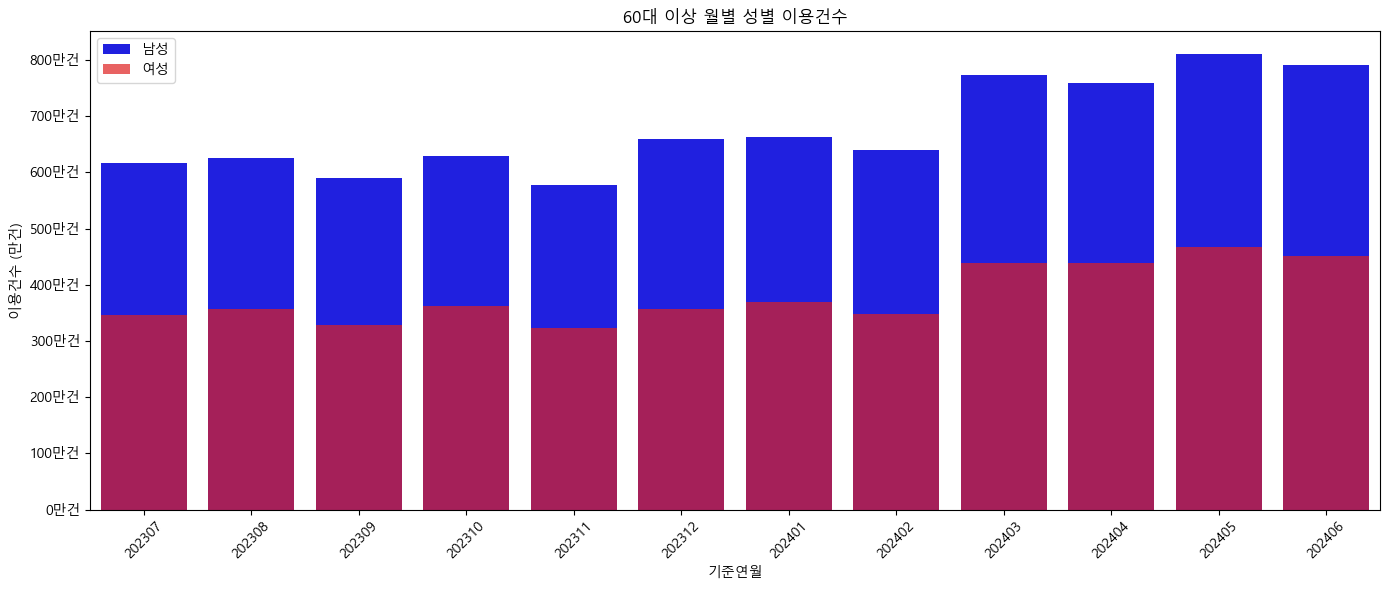

In [29]:
# 🔹 월별 성별 이용건수 막대그래프
plt.figure(figsize=(14, 6))
sns.barplot(x=usage_summary_60s["기준연월"].astype(str), y=usage_summary_60s["남성60대이상이용건수합계"], color="blue", label="남성")
sns.barplot(x=usage_summary_60s["기준연월"].astype(str), y=usage_summary_60s["여성60대이상이용건수합계"], color="red", label="여성", alpha=0.7)
plt.title("60대 이상 월별 성별 이용건수")
plt.xlabel("기준연월")
plt.ylabel("이용건수 (만건)")
plt.xticks(rotation=45)
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x)}만건'))
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_14912\4066978959.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_60s["총이용건수"] = data_60s[columns_60s_usage].sum(axis=1)


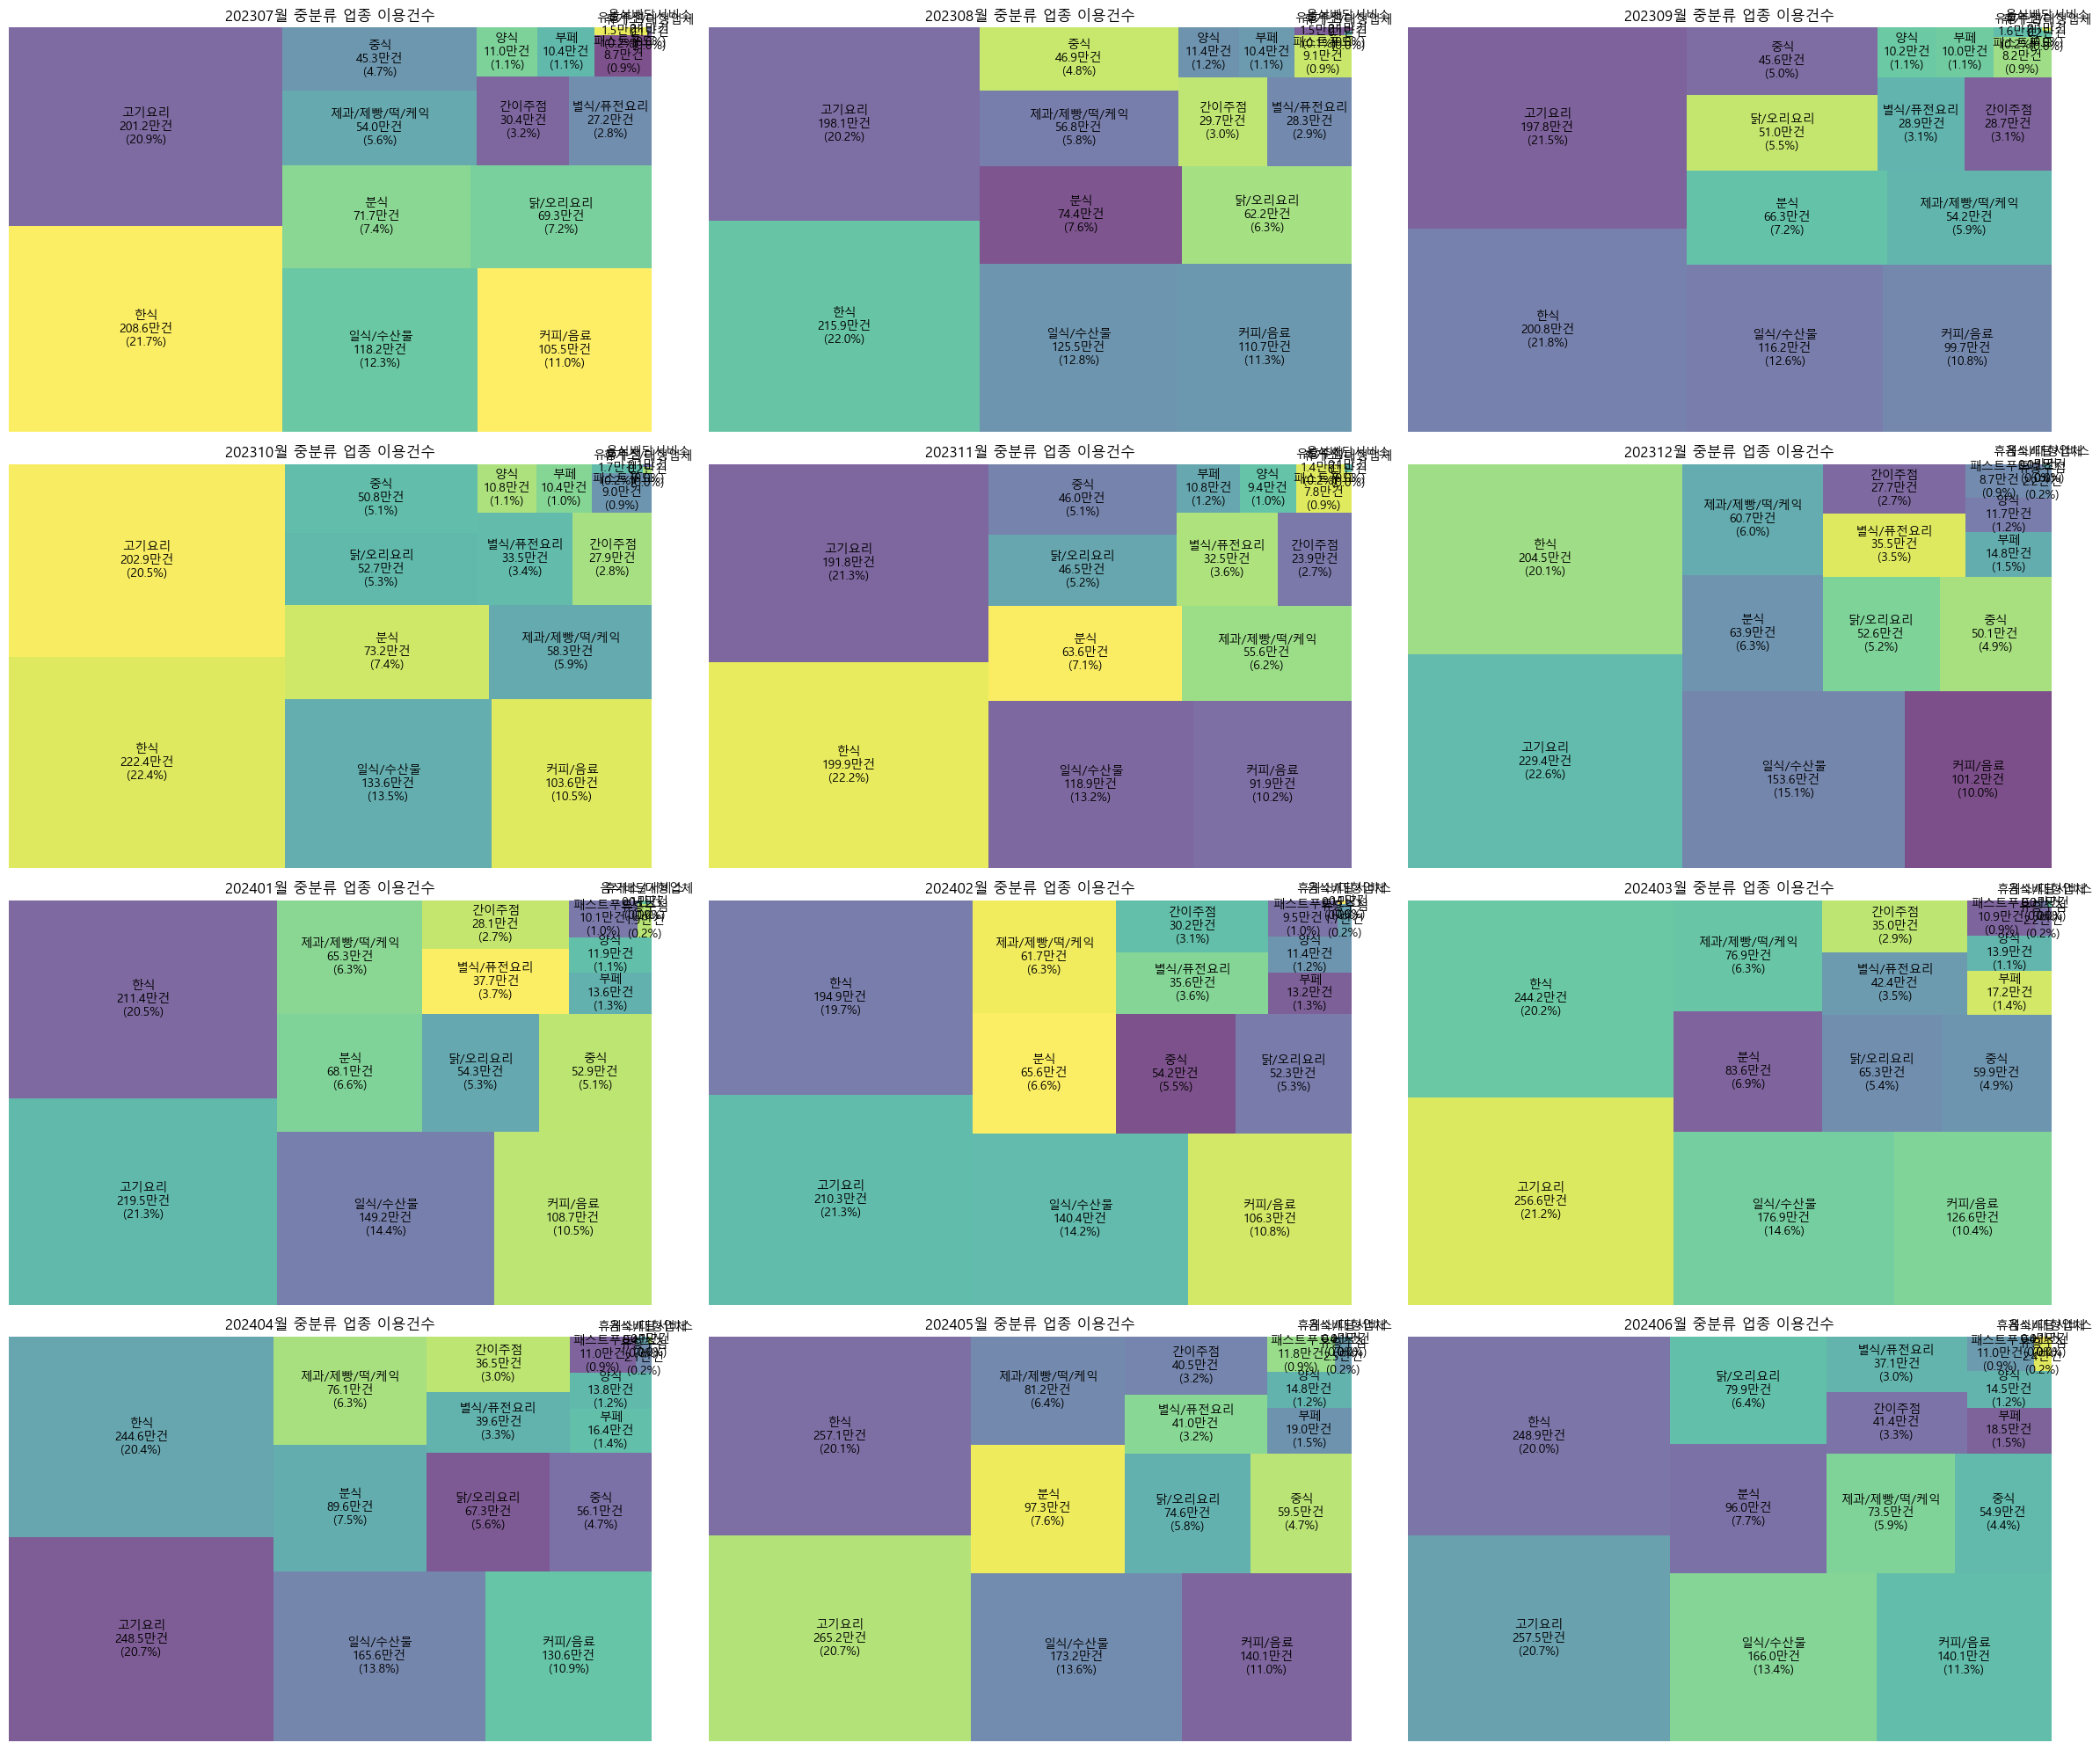

In [30]:
#60대 이상 월별 - 업종별 이용건수 확인 및 트리맵 시각화 
#  60대 이상 데이터 필터링
columns_60s_sales = ["남성60대이상매출금액합계", "여성60대이상매출금액합계"]
columns_60s_usage = ["남성60대이상이용건수합계", "여성60대이상이용건수합계"]
data_60s = data[["중분류업종명", "기준연월"] + columns_60s_sales + columns_60s_usage]

#  월별 60대 이상 이용건수 합계 계산
data_60s["총이용건수"] = data_60s[columns_60s_usage].sum(axis=1)

# 월별 이용건수 비율 추가 및 표 출력
monthly_usage_tables = {}

unique_months = sorted(data_60s["기준연월"].unique())
fig, axes = plt.subplots(4, 3, figsize=(24, 20))
axes = axes.flatten()

for i, month in enumerate(unique_months):
    month_data = data_60s[data_60s["기준연월"] == month].groupby("중분류업종명")["총이용건수"].sum().reset_index()
    month_data = month_data.sort_values(by="총이용건수", ascending=False)
    month_data["비율(%)"] = (month_data["총이용건수"] / month_data["총이용건수"].sum() * 100).round(1)
    
    # 저장할 표 데이터
    monthly_usage_tables[month] = month_data
    
    ax = axes[i]
    labels = [f'{name}\n{value:.1f}만건\n({pct}%)' for name, value, pct in zip(month_data["중분류업종명"], month_data["총이용건수"] / 10000, month_data["비율(%)"])]
    squarify.plot(sizes=month_data["총이용건수"], label=labels, ax=ax, alpha=0.7)
    ax.set_title(f"{month}월 중분류 업종 이용건수")
    ax.axis("off")

plt.tight_layout()
plt.show()
    



C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_14912\2736727284.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_60s["총매출"] = data_60s[columns_60s_sales].sum(axis=1)


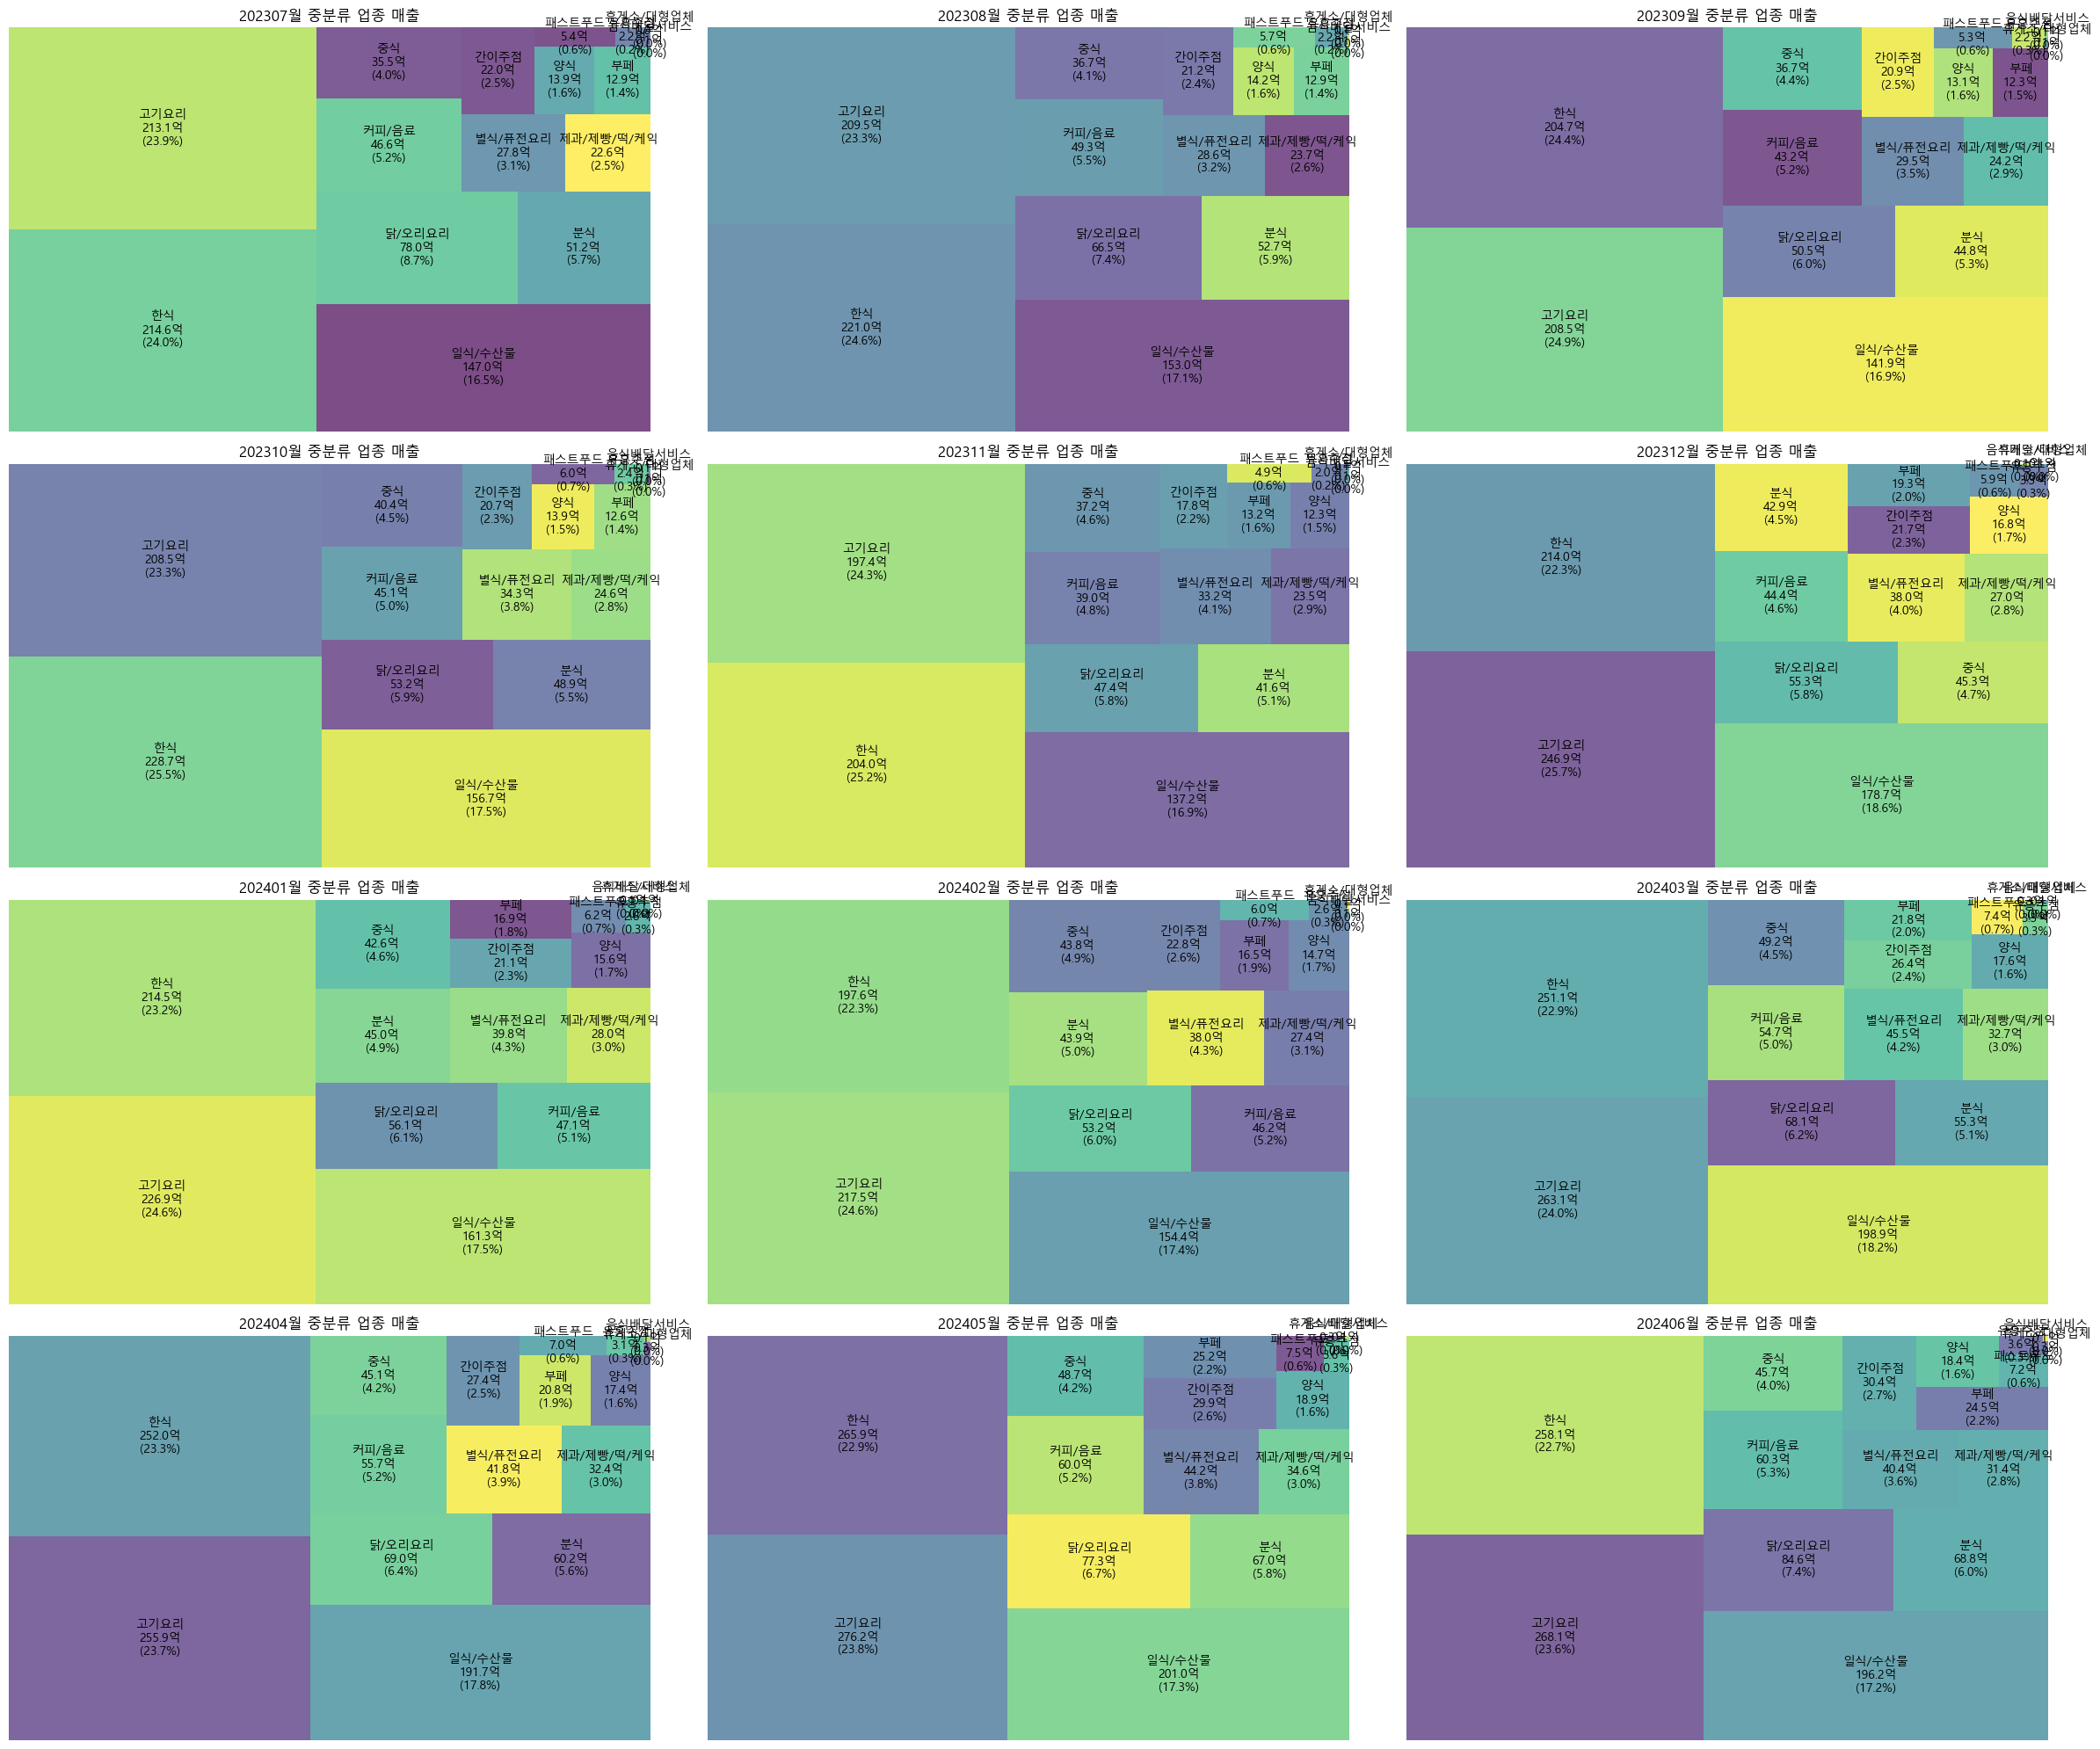

In [31]:
#월별  60대이상 업종중뷴류별 매출  확인 및 시각화 -트리맵
# 60대 이상 데이터 필터링 
# columns_60s_sales = ["남성60대이상매출금액합계", "여성60대이상매출금액합계"]
data_60s = data[["중분류업종명", "기준연월"] + columns_60s_sales]

# 월별 60대 이상 매출 합계 계산
data_60s["총매출"] = data_60s[columns_60s_sales].sum(axis=1)

# 월별 매출 비율 추가 및 표 출력
monthly_sales_tables = {}

unique_months = sorted(data_60s["기준연월"].unique())
fig, axes = plt.subplots(4, 3, figsize=(24, 20))
axes = axes.flatten()

for i, month in enumerate(unique_months):
    month_data = data_60s[data_60s["기준연월"] == month].groupby("중분류업종명")["총매출"].sum().reset_index()
    month_data = month_data.sort_values(by="총매출", ascending=False)
    month_data["비율(%)"] = (month_data["총매출"] / month_data["총매출"].sum() * 100).round(1)
    
    # 저장할 표 데이터
    monthly_sales_tables[month] = month_data
    
    ax = axes[i]
    labels = [f'{name}\n{value:.1f}억\n({pct}%)' for name, value, pct in zip(month_data["중분류업종명"], month_data["총매출"] / 100000000, month_data["비율(%)"])]
    squarify.plot(sizes=month_data["총매출"], label=labels, ax=ax, alpha=0.7)
    ax.set_title(f"{month}월 중분류 업종 매출")
    ax.axis("off")

plt.tight_layout()
plt.show()


In [32]:
#  1. 연간 평균 소비 금액 계산 (업종별 1회 이용건당)
#  60대 이상 데이터 필터링
columns_60s_sales = ["남성60대이상매출금액합계", "여성60대이상매출금액합계"]
columns_60s_usage = ["남성60대이상이용건수합계", "여성60대이상이용건수합계"]
data_60s = data[["중분류업종명", "기준연월"] + columns_60s_sales + columns_60s_usage]
data_60s["총매출"] = data_60s[columns_60s_sales].sum(axis=1)
data_60s["총이용건수"] = data_60s[columns_60s_usage].sum(axis=1)

annual_avg_spending = data_60s.groupby("중분류업종명").agg({
    "총매출": "sum",
    "총이용건수": "sum",
    "남성60대이상매출금액합계": "sum",
    "여성60대이상매출금액합계": "sum",
    "남성60대이상이용건수합계": "sum",
    "여성60대이상이용건수합계": "sum"
}).reset_index()

annual_avg_spending["평균 소비금액(전체)"] = (annual_avg_spending["총매출"] / annual_avg_spending["총이용건수"]).round(1)
annual_avg_spending["남성 평균 소비금액"] = (annual_avg_spending["남성60대이상매출금액합계"] / annual_avg_spending["남성60대이상이용건수합계"]).round(1)
annual_avg_spending["여성 평균 소비금액"] = (annual_avg_spending["여성60대이상매출금액합계"] / annual_avg_spending["여성60대이상이용건수합계"]).round(1)

display(annual_avg_spending[["중분류업종명", "평균 소비금액(전체)", "남성 평균 소비금액", "여성 평균 소비금액"]])

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_14912\861656694.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_60s["총매출"] = data_60s[columns_60s_sales].sum(axis=1)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_14912\861656694.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_60s["총이용건수"] = data_60s[columns_60s_usage].sum(axis=1)


,중분류업종명,평균 소비금액(전체),남성 평균 소비금액,여성 평균 소비금액
0,간이주점,7425.4,7374.3,7576.7
1,고기요리,10421.6,10245.4,10804.1
2,닭/오리요리,10432.3,10053.8,11253.2
3,별식/퓨전요리,10516.4,9891.7,11752.3
4,부페,12688.7,12114.7,13691.8
5,분식,6816.2,7056.1,6508.6
6,양식,12895.9,12943.5,12836.1
7,유흥주점,14537.7,14461.1,14808.4
8,음식배달서비스,11821.3,11465.3,12738.3
9,일식/수산물,11615.9,11516.3,11812.7


In [33]:
# 2. 월별 업종별 평균 소비금액 계산
monthly_avg_spending = data_60s.groupby(["기준연월", "중분류업종명"]).agg({
    "총매출": "sum",
    "총이용건수": "sum"
}).reset_index()

monthly_avg_spending["월별 평균 소비금액"] = (monthly_avg_spending["총매출"] / monthly_avg_spending["총이용건수"]).round(1)
monthly_avg_spending_table = monthly_avg_spending.pivot(index="중분류업종명", columns="기준연월", values="월별 평균 소비금액")

display(monthly_avg_spending_table)


기준연월,202307,202308,202309,202310,202311,202312,202401,202402,202403,202404,202405,202406
중분류업종명,,,,,,,,,,,,
간이주점,7224.6,7125.5,7273.9,7420.2,7459.8,7844.3,7508.7,7530.7,7538.3,7499.1,7391.7,7335.4
고기요리,10592.5,10576.9,10540.0,10279.8,10294.4,10764.5,10334.1,10342.9,10251.9,10296.7,10417.1,10412.0
닭/오리요리,11255.1,10700.4,9906.4,10094.9,10206.2,10528.5,10339.6,10154.2,10420.5,10265.9,10361.3,10597.7
별식/퓨전요리,10189.4,10101.0,10185.3,10222.9,10218.9,10708.3,10541.8,10660.2,10736.1,10566.7,10784.1,10909.9
부페,12396.4,12433.3,12270.9,12167.6,12238.4,12991.0,12467.0,12504.9,12681.7,12686.7,13279.0,13230.4
분식,7147.6,7086.2,6749.4,6673.8,6548.8,6717.8,6607.7,6691.8,6623.0,6718.0,6889.5,7175.0
양식,12654.8,12529.4,12809.0,12823.2,13029.4,14313.6,13120.8,12911.3,12703.7,12564.7,12769.0,12683.2
유흥주점,14685.4,14961.4,13525.9,13614.6,14574.8,15102.1,14141.7,14918.3,15181.7,14545.7,14394.2,14598.6
음식배달서비스,12007.9,11865.2,11700.2,11311.2,12352.3,12724.3,11021.9,11759.4,11826.0,11712.6,12218.7,11656.3


In [34]:
#  3. 평균 소비금액이 높은 상위 5개 업종 산출
top_5_annual = annual_avg_spending.sort_values(by="평균 소비금액(전체)", ascending=False).head(5)
display(top_5_annual)

,중분류업종명,총매출,총이용건수,남성60대이상매출금액합계,여성60대이상매출금액합계,남성60대이상이용건수합계,여성60대이상이용건수합계,평균 소비금액(전체),남성 평균 소비금액,여성 평균 소비금액
7,유흥주점,3.316428e+09,228126.0,2.571417e+09,7.450111e+08,177816.0,50310.0,14537.7,14461.1,14808.4
6,양식,1.867292e+10,1447970.0,1.044133e+10,8.231598e+09,806686.0,641284.0,12895.9,12943.5,12836.1
4,부페,2.088207e+10,1645725.0,1.268139e+10,8.200677e+09,1046779.0,598946.0,12688.7,12114.7,13691.8
8,음식배달서비스,1.351052e+08,11429.0,9.439360e+07,4.071160e+07,8233.0,3196.0,11821.3,11465.3,12738.3
9,일식/수산물,2.017885e+11,17371709.0,1.328086e+11,6.897989e+10,11532218.0,5839491.0,11615.9,11516.3,11812.7


In [35]:
#  4. 60대이상 상위 5개 매출금액 중분류 업종
top_5_sales = annual_avg_spending.sort_values(by="총매출", ascending=False).head(5)
display(top_5_sales[["중분류업종명", "총매출"]])

,중분류업종명,총매출
1,고기요리,2.791605e+11
14,한식,2.726222e+11
9,일식/수산물,2.017885e+11
2,닭/오리요리,7.593315e+10
5,분식,6.224374e+10


In [36]:
#  5. 60대이상 상위 5개 이용건수 중분류 업종
top_5_usage = annual_avg_spending.sort_values(by="총이용건수", ascending=False).head(5)
display(top_5_usage[["중분류업종명", "총이용건수"]])

,중분류업종명,총이용건수
1,고기요리,26786622.0
14,한식,26532279.0
9,일식/수산물,17371709.0
12,커피/음료,13650290.0
5,분식,9131790.0


In [37]:
#  6. 60대이상 월별 TOP5 매출 중분류 업종
monthly_top5_sales = monthly_avg_spending.groupby("기준연월").apply(lambda x: x.nlargest(5, "총매출")).reset_index(drop=True)
display(monthly_top5_sales)


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_14912\1771411961.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monthly_top5_sales = monthly_avg_spending.groupby("기준연월").apply(lambda x: x.nlargest(5, "총매출")).reset_index(drop=True)


,기준연월,중분류업종명,총매출,총이용건수,월별 평균 소비금액
0,202307,한식,2.146044e+10,2086364.0,10286.0
1,202307,고기요리,2.131338e+10,2012126.0,10592.5
2,202307,일식/수산물,1.469989e+10,1182104.0,12435.4
3,202307,닭/오리요리,7.801906e+09,693188.0,11255.1
4,202307,분식,5.124472e+09,716955.0,7147.6
5,202308,한식,2.209508e+10,2158534.0,10236.2
6,202308,고기요리,2.094765e+10,1980510.0,10576.9
7,202308,일식/수산물,1.530073e+10,1255482.0,12187.1
8,202308,닭/오리요리,6.653291e+09,621778.0,10700.4
9,202308,분식,5.271643e+09,743935.0,7086.2


In [38]:
#  7. 월별 TOP5 이용건수 중분류 업종
monthly_top5_usage = monthly_avg_spending.groupby("기준연월").apply(lambda x: x.nlargest(5, "총이용건수")).reset_index(drop=True)
display(monthly_top5_usage)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_14912\2899942144.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monthly_top5_usage = monthly_avg_spending.groupby("기준연월").apply(lambda x: x.nlargest(5, "총이용건수")).reset_index(drop=True)


,기준연월,중분류업종명,총매출,총이용건수,월별 평균 소비금액
0,202307,한식,2.146044e+10,2086364.0,10286.0
1,202307,고기요리,2.131338e+10,2012126.0,10592.5
2,202307,일식/수산물,1.469989e+10,1182104.0,12435.4
3,202307,커피/음료,4.660285e+09,1055309.0,4416.0
4,202307,분식,5.124472e+09,716955.0,7147.6
5,202308,한식,2.209508e+10,2158534.0,10236.2
6,202308,고기요리,2.094765e+10,1980510.0,10576.9
7,202308,일식/수산물,1.530073e+10,1255482.0,12187.1
8,202308,커피/음료,4.927206e+09,1107072.0,4450.7
9,202308,분식,5.271643e+09,743935.0,7086.2


In [39]:
#  6-2. TOP5 중분류 업종 등장 빈도 및 매출/이용건수 분석
top5_categories = pd.concat([monthly_top5_sales["중분류업종명"], monthly_top5_usage["중분류업종명"]]).value_counts().index[:7]

summary_table = pd.DataFrame(index=["등장빈도", "60대 총 매출(억)", "60대 총 이용건수", "60대 건당 소비금액", "전체 건당 소비금액"], columns=top5_categories)

for category in top5_categories:
    summary_table.loc["등장빈도", category] = (monthly_top5_sales["중분류업종명"].eq(category).sum() + monthly_top5_usage["중분류업종명"].eq(category).sum())
    summary_table.loc["60대 총 매출(억)", category] = (annual_avg_spending.loc[annual_avg_spending["중분류업종명"] == category, "총매출"].sum() / 100000000).round(1)
    summary_table.loc["60대 총 이용건수", category] = annual_avg_spending.loc[annual_avg_spending["중분류업종명"] == category, "총이용건수"].sum()
    summary_table.loc["60대 건당 소비금액", category] = (summary_table.loc["60대 총 매출(억)", category] * 100000000 / summary_table.loc["60대 총 이용건수", category]).round(1)
    summary_table.loc["전체 건당 소비금액", category] = (data_60s.loc[data_60s["중분류업종명"] == category, "총매출"].sum() / data_60s.loc[data_60s["중분류업종명"] == category, "총이용건수"].sum()).round(1)

display(summary_table)

중분류업종명,한식,고기요리,일식/수산물,분식,커피/음료,닭/오리요리,중식
등장빈도,24,24,24,21,14,12,1
60대 총 매출(억),2726.2,2791.6,2017.9,622.4,591.5,759.3,506.8
60대 총 이용건수,26532279.0,26786622.0,17371709.0,9131790.0,13650290.0,7278639.0,6220775.0
60대 건당 소비금액,10275.0,10421.6,11616.0,6815.8,4333.2,10431.9,8146.9
전체 건당 소비금액,10275.1,10421.6,11615.9,6816.2,4333.3,10432.3,8147.0


In [40]:
#  6-2. TOP5 중분류 업종 등장 빈도 및 매출/이용건수 분석
top5_categories = pd.concat([monthly_top5_sales["중분류업종명"], monthly_top5_usage["중분류업종명"]]).value_counts().index[:6]

summary_table = pd.DataFrame(index=["등장빈도", "60대 총 매출(억)", "60대 총 이용건수", "60대 건당 소비금액", "전체 건당 소비금액"], columns=top5_categories)

for category in top5_categories:
    summary_table.loc["등장빈도", category] = (monthly_top5_sales["중분류업종명"].eq(category).sum() + monthly_top5_usage["중분류업종명"].eq(category).sum())
    summary_table.loc["60대 총 매출(억)", category] = (annual_avg_spending.loc[annual_avg_spending["중분류업종명"] == category, "총매출"].sum() / 100000000).round(1)
    summary_table.loc["60대 총 이용건수", category] = annual_avg_spending.loc[annual_avg_spending["중분류업종명"] == category, "총이용건수"].sum()
    summary_table.loc["60대 건당 소비금액", category] = (summary_table.loc["60대 총 매출(억)", category] * 100000000 / summary_table.loc["60대 총 이용건수", category]).round(1)
    summary_table.loc["전체 건당 소비금액", category] = (data_60s.loc[data_60s["중분류업종명"] == category, "총매출"].sum() / data_60s.loc[data_60s["중분류업종명"] == category, "총이용건수"].sum()).round(1)

display(summary_table)

중분류업종명,한식,고기요리,일식/수산물,분식,커피/음료,닭/오리요리
등장빈도,24,24,24,21,14,12
60대 총 매출(억),2726.2,2791.6,2017.9,622.4,591.5,759.3
60대 총 이용건수,26532279.0,26786622.0,17371709.0,9131790.0,13650290.0,7278639.0
60대 건당 소비금액,10275.0,10421.6,11616.0,6815.8,4333.2,10431.9
전체 건당 소비금액,10275.1,10421.6,11615.9,6816.2,4333.3,10432.3
